In [1]:
import torch
import torch.nn as nn
import sys
sys.path.append('/home/jovyan/pytorchjob')

import importlib

from models.generator import DCGAN_G
from models.generatorFull import Hcal_ecalEMB
from matplotlib.colors import LogNorm

import random
from torch.autograd import Variable
import interactive.physics.plotting as phys
import interactive.physics.basics as B
import interactive.inference.generate as G

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import matplotlib.patches as mpatches

In [3]:
f50 = h5py.File('/eos/user/e/eneren/scratch/50GeV75k.hdf5', 'r')
s50E = f50['ecal/layers'][2000:4000]
s50H = f50['hcal/layers'][2000:4000]


s50E[ s50E < 0.1] = 0.0
s50H[ s50H < 0.25] = 0.0

cReal50 = np.concatenate((s50E , s50H ),1)

esumRealECAL50 = B.getTotE(s50E, 30, 30, 30)
esumRealHCAL50 = B.getTotE(s50H, 30, 30, 48)
esumReal50 = B.getTotE(cReal50, 30, 30, 78)

showers  = {
    '50F': esumReal50,
    '50E': esumRealECAL50,
    '50H': esumRealHCAL50
}

Current Epoch:  400
JSD score:  0.41575407231706524
Current Epoch:  401
JSD score:  0.41000758304523643
Current Epoch:  402
JSD score:  0.44929706449735357
Current Epoch:  403
JSD score:  0.43896079821652834
Current Epoch:  404
JSD score:  0.39471422575778975
Current Epoch:  405
JSD score:  0.4387965533695156
Current Epoch:  406
JSD score:  0.4269749144395274
Current Epoch:  407
JSD score:  0.433596208878635
Current Epoch:  408
JSD score:  0.4508886078806594
Current Epoch:  409
JSD score:  0.4298791494735011
Current Epoch:  410
JSD score:  0.3952860317933848
Current Epoch:  411
JSD score:  0.4188657651330782
Current Epoch:  412
JSD score:  0.4096143677351369
Current Epoch:  413
JSD score:  0.3790028844337211
Current Epoch:  414
JSD score:  0.4291362309659525
Current Epoch:  415
JSD score:  0.3702733140623327
Current Epoch:  416
JSD score:  0.3878590785798226
Current Epoch:  417
JSD score:  0.4228667257632301
Current Epoch:  418
JSD score:  0.44911196964215483
Current Epoch:  419
JSD sc

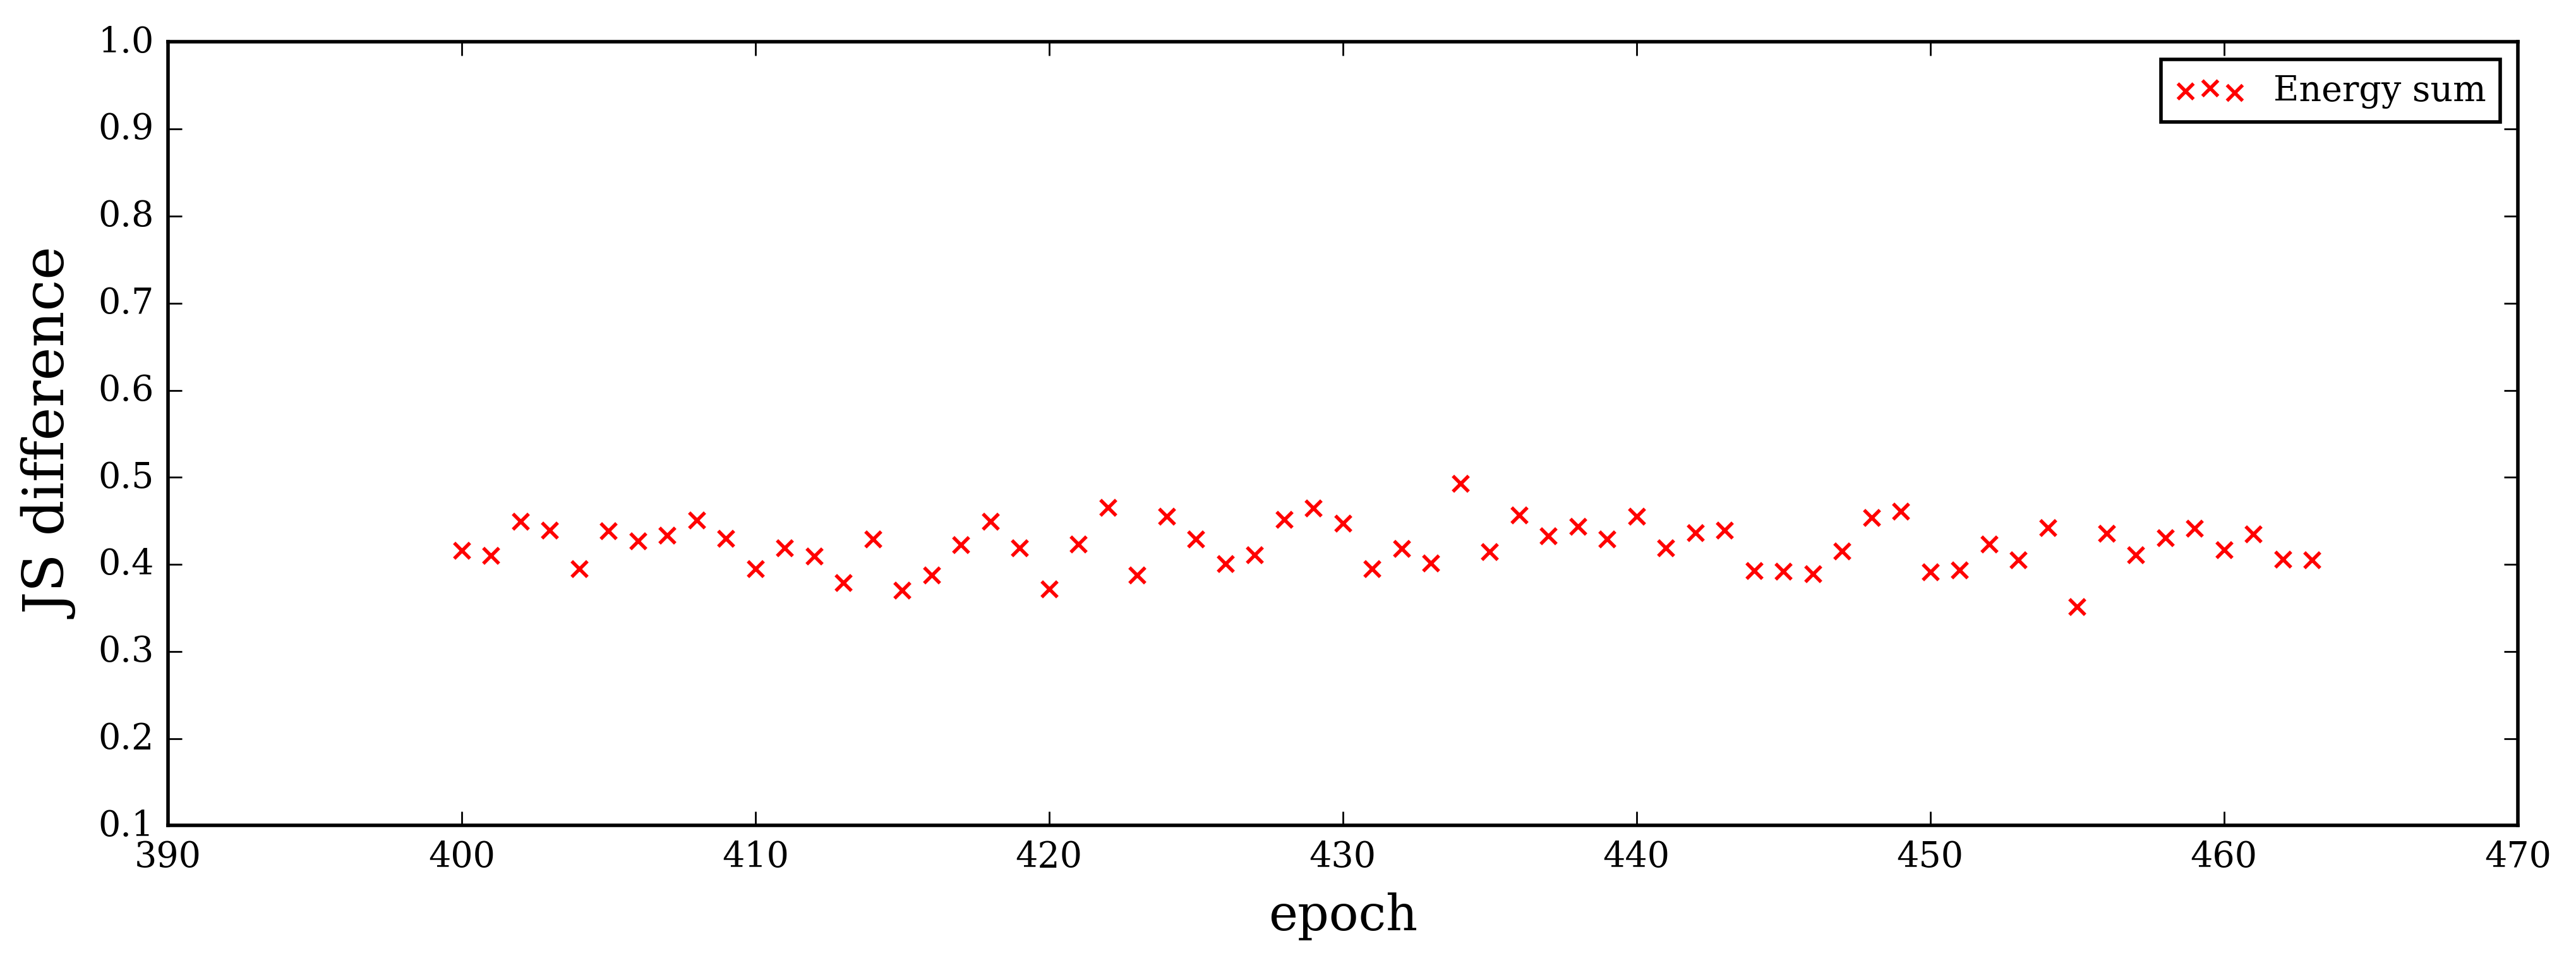

In [4]:
importlib.reload(B)
importlib.reload(G)
G.fid_scan(showers, 2000, 400, 464)

In [ ]:
%reset_selective -f "^fE$"
%reset_selective -f "^fH$"
%reset_selective -f "^fakeShower$"

In [5]:
importlib.reload(G)
eph=455
fakeShower, fE, fH = G.make_shower(eph, 50, 2000)

Generating of showers: current batch 500  .......
Generating of showers: current batch 1000  .......
Generating of showers: current batch 1500  .......
Generating of showers: current batch 2000  .......


In [6]:
B.getTotE(fH, 30, 30, 48)

array([882.59924, 681.345  , 798.82   , ..., 774.4734 , 910.65594,
       714.55817], dtype=float32)

In [7]:
### MIP CUT
##MIPcut

fE[ fE < 0.1] = 0.0
fH[ fH < 0.25] = 0.0
fakeShower = np.concatenate((fE , fH ),1)



/home/jovyan/pytorchjob/interactive/physics/plotting.py:209: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figExIm, (axExIm1, axExIm2) = plt.subplots(1, 2, figsize=(20, 6))


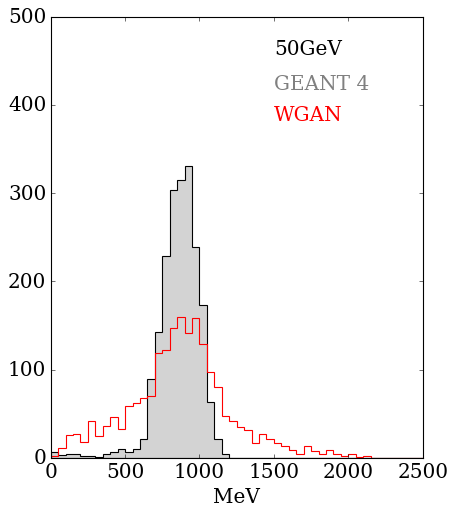

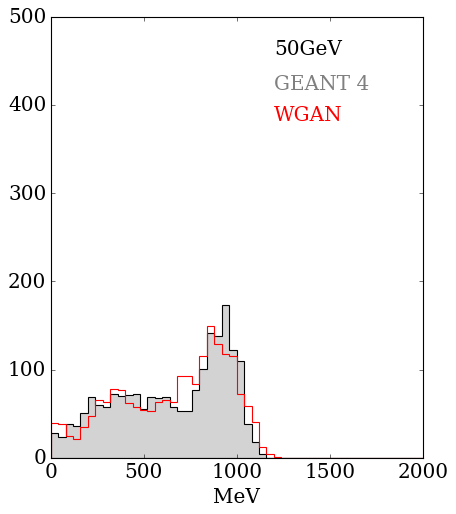

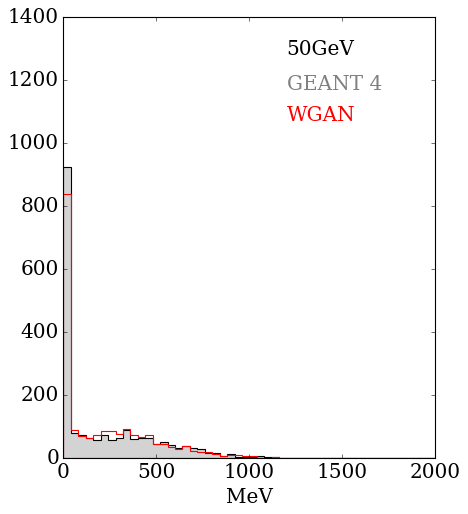

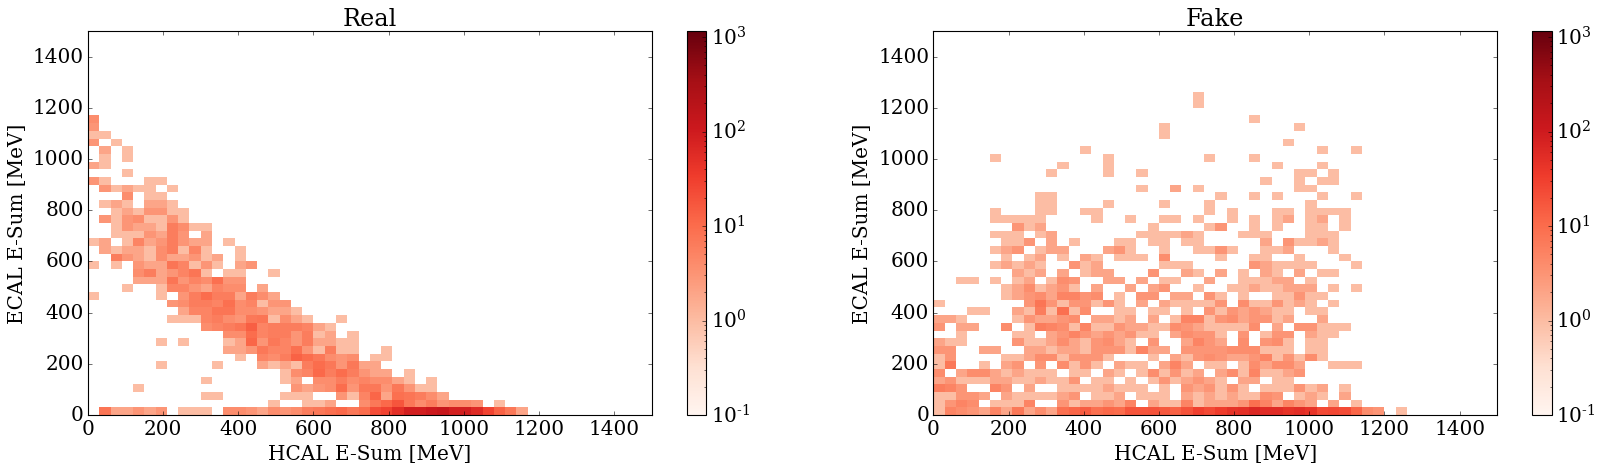

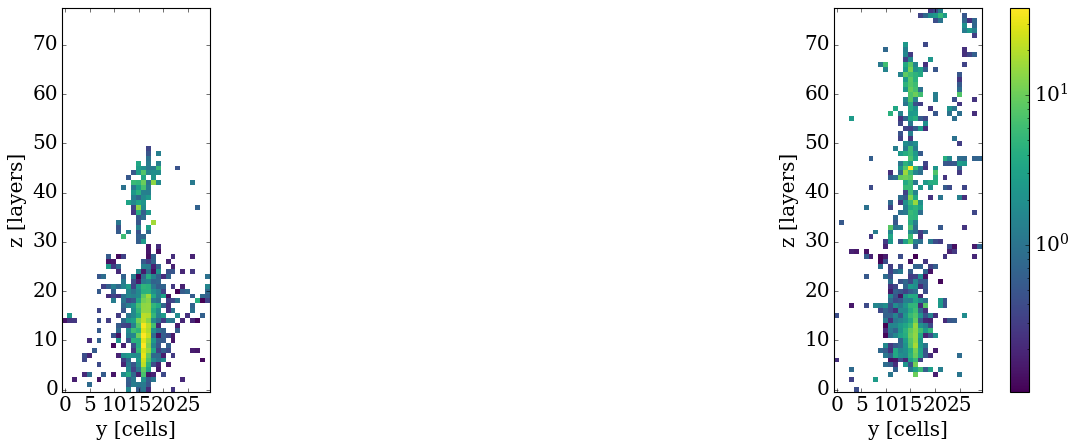

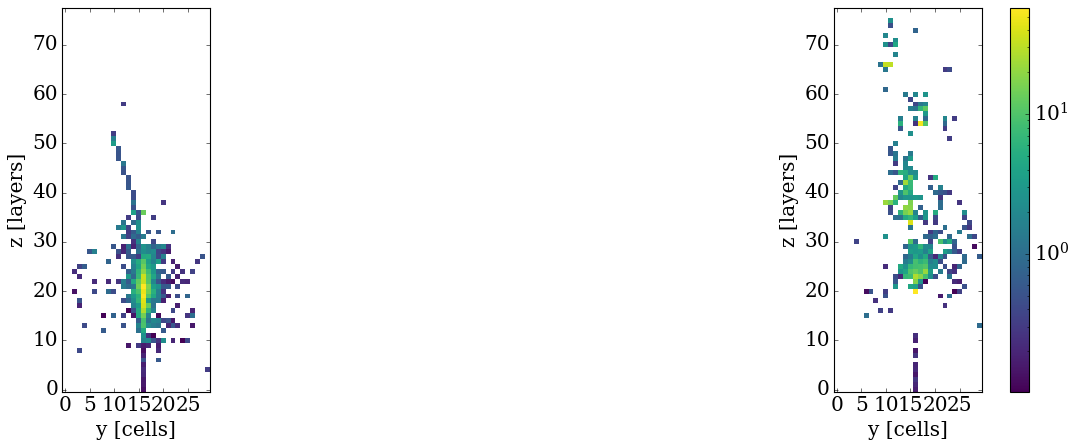

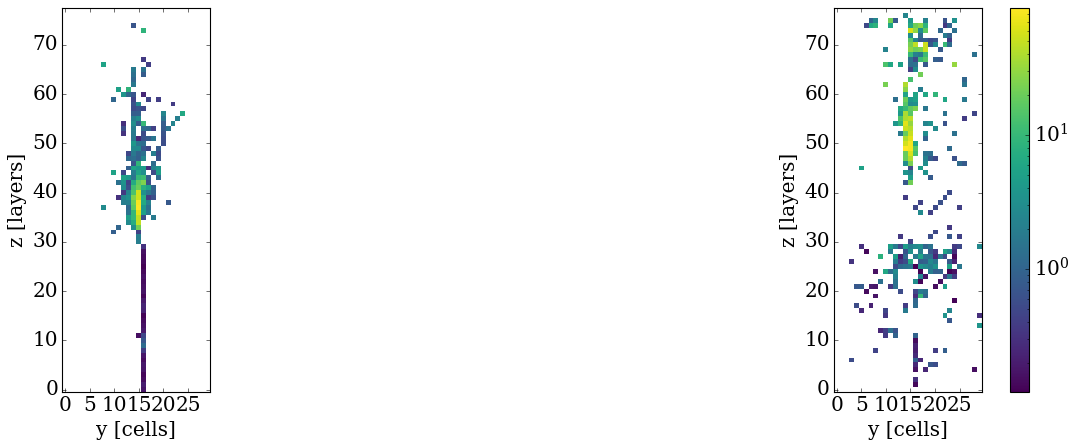

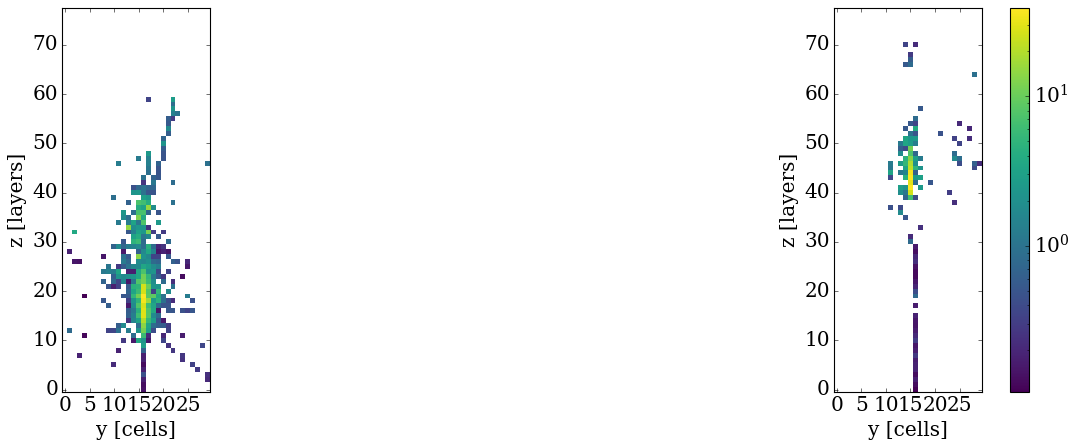

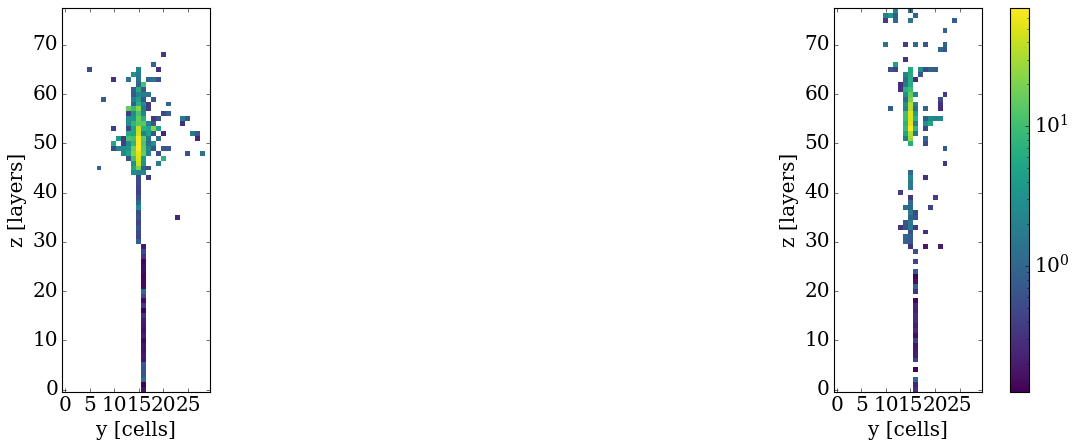

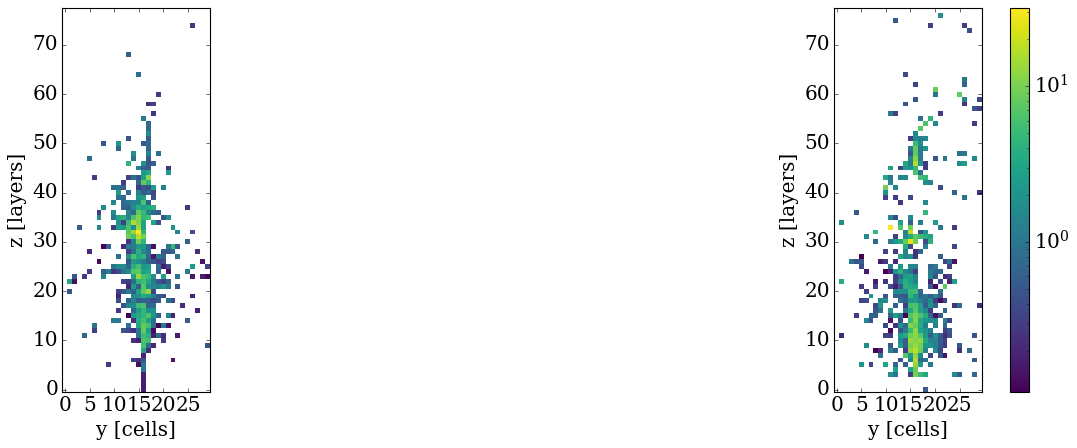

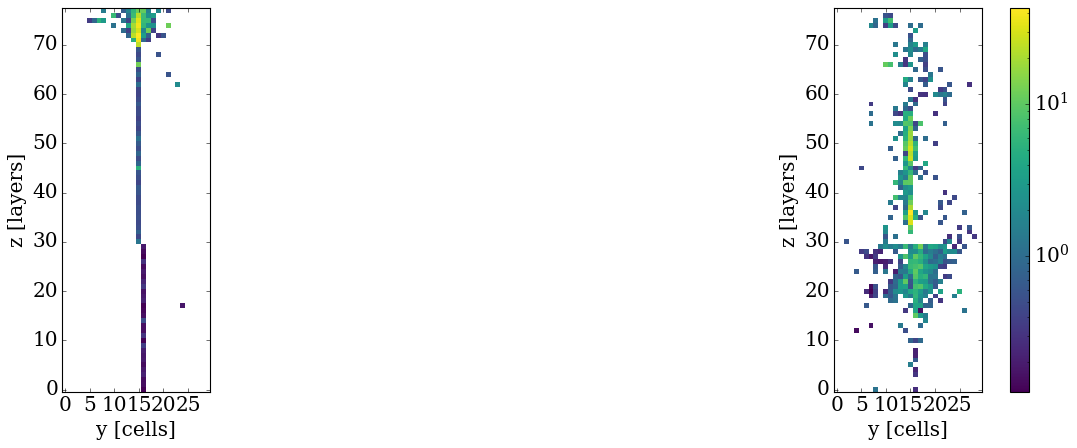

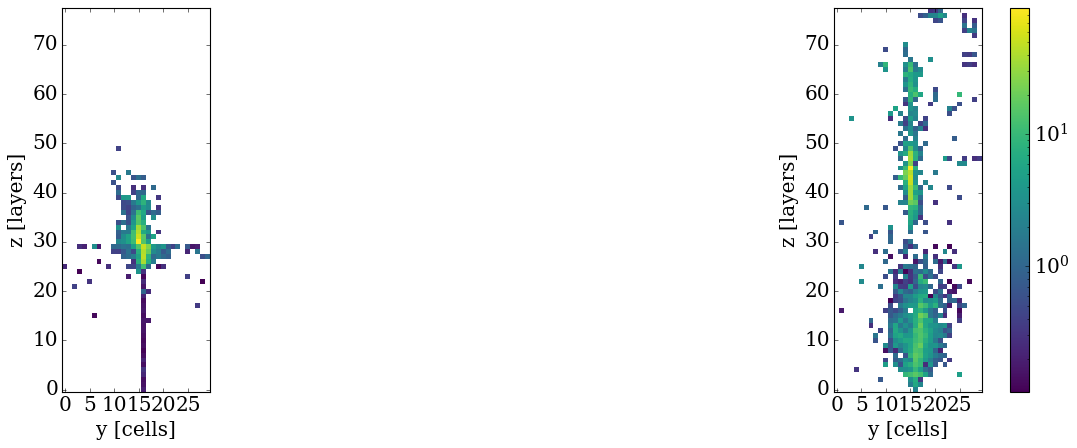

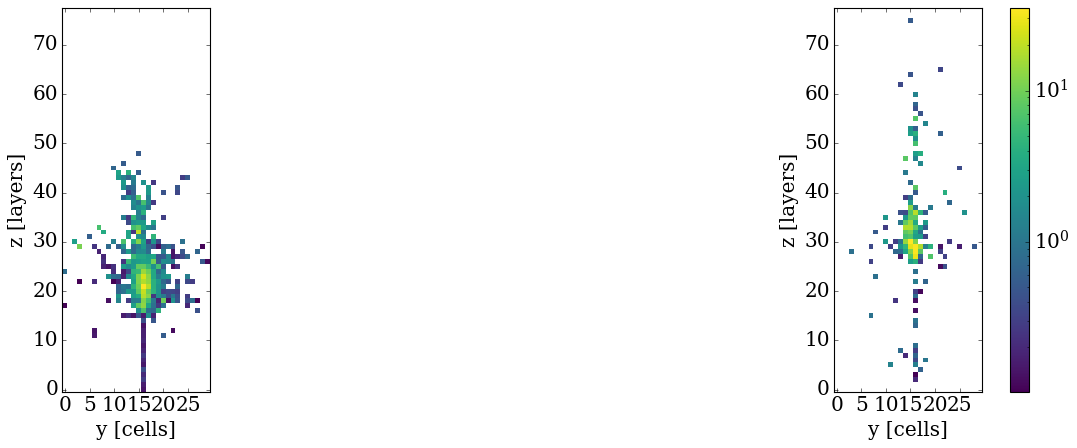

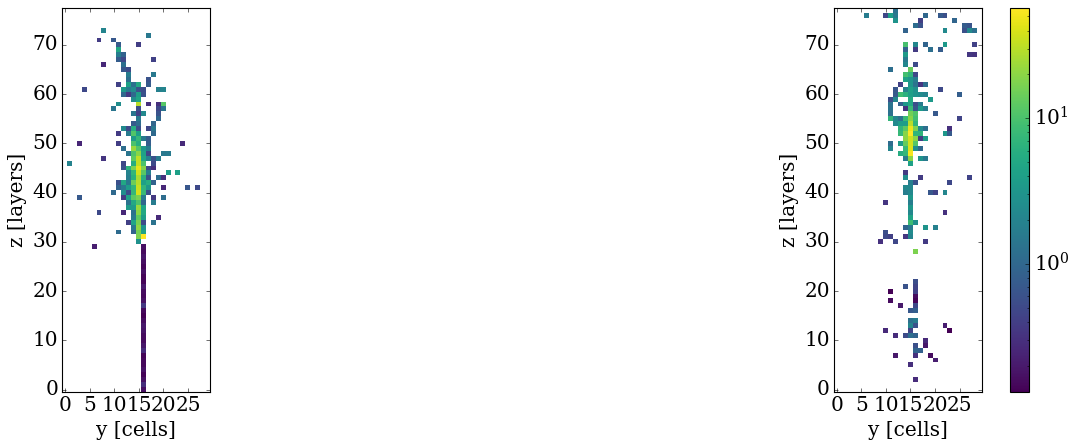

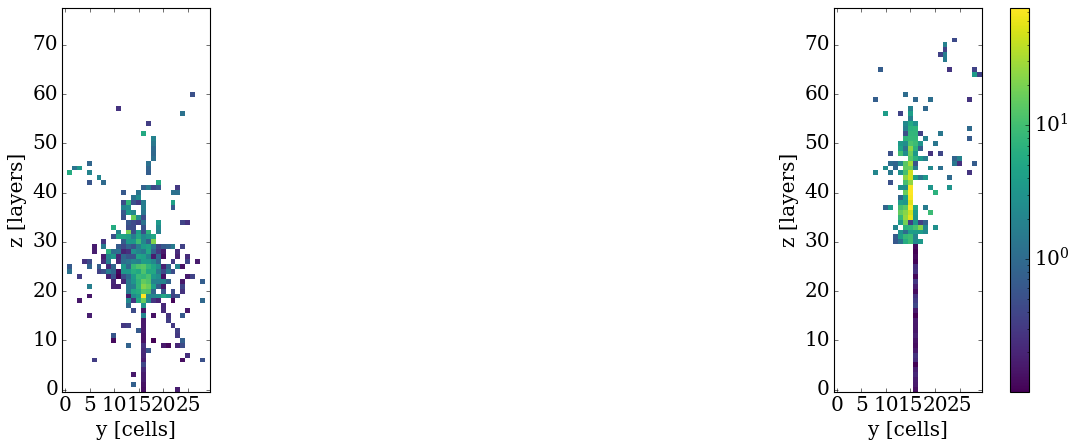

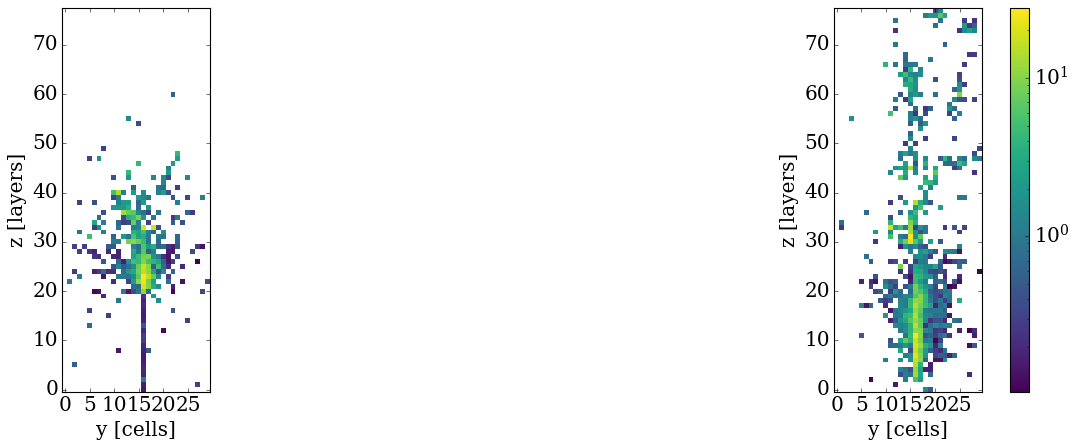

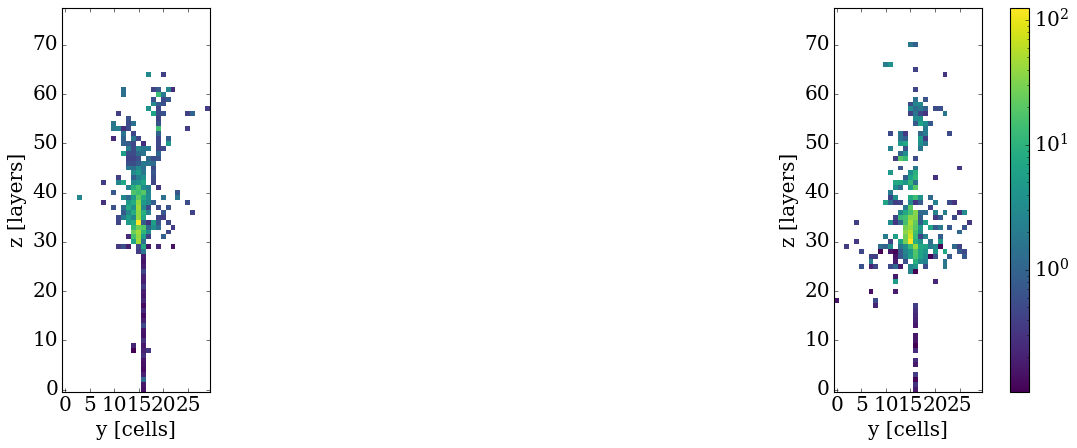

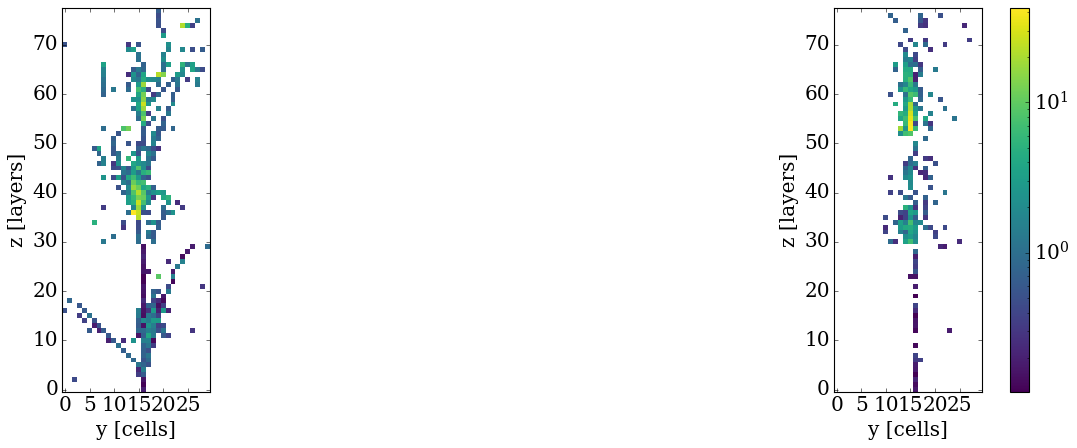

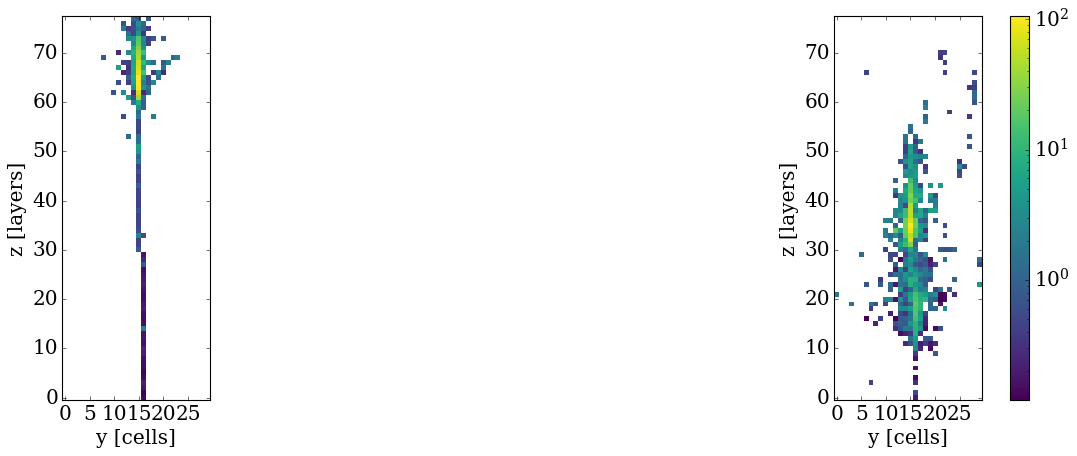

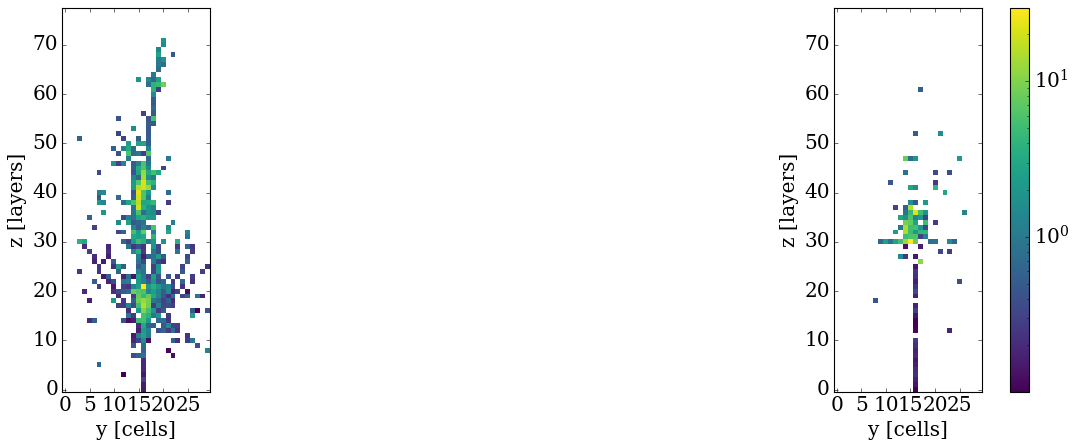

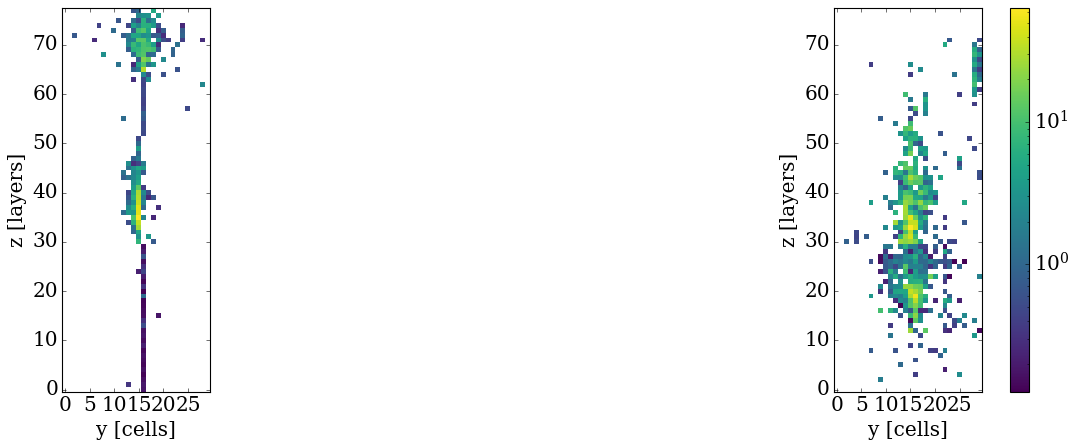

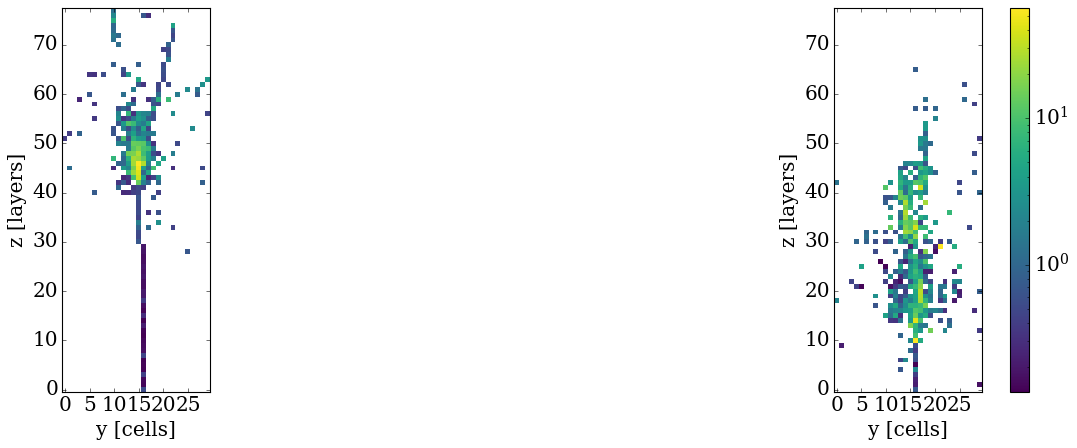

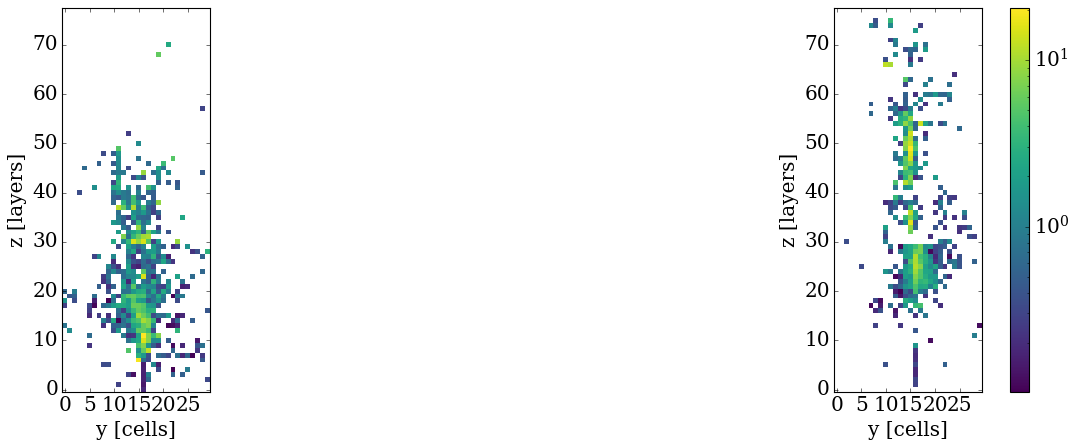

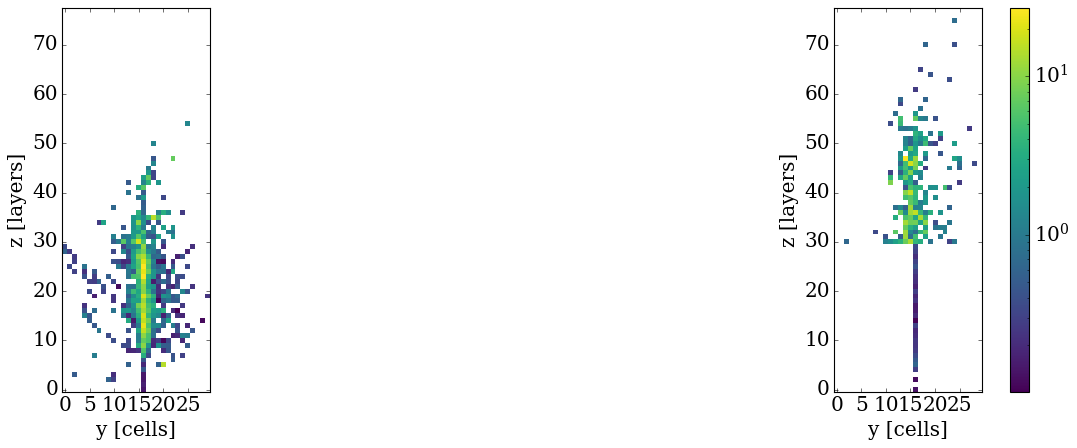

In [8]:
importlib.reload(phys)
importlib.reload(B)
phys.plot_esum(esumReal50, B.getTotE(fakeShower, 30, 30, 78), 50, 0, 2500, 500, '50_GeV_pe_eph'+str(eph))

phys.plot_esum(esumRealHCAL50, B.getTotE(fH, 30, 30, 48), 50, 0, 2000, 500, '50_GeV_HCAL_pe_eph'+str(eph))
phys.plot_esum(esumRealECAL50, B.getTotE(fE, 30, 30, 30), 50, 0, 2000, 1400, '50_GeV_ECAL_pe_eph'+str(eph))

phys.esum_2D(esumRealECAL50, esumRealHCAL50, 
             B.getTotE(fE, 30, 30, 30), B.getTotE(fH, 30, 30, 48),
             nbinsX=50, nbinsY=50, name='eph'+str(eph))

for i in range(190,210):
    phys.plot_combinedSingleXZ(cReal50, fakeShower, i)

In [ ]:
importlib.reload(phys)
R50 = B.getLongProfile(cReal50, 30, 30, 78)
F50 = B.getLongProfile(fakeShower, 30, 30, 78)

phys.plt_Profile(R50, F50, save_title='Eph_v3'+str(eph))

In [ ]:
importlib.reload(phys)


nhitR = B.getOcc(cReal50, 30, 30, 78)
nhitF = B.getOcc(fakeShower, 30, 30, 78)

phys.plt_nhits(nhitR, nhitF, 'WGAN', save_title='50GeV_eph_v3'+str(eph))

In [ ]:
print('matplotlib: {}'.format(mpl.__version__))